In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

import seaborn as sns
from utils import *

In [7]:
tools=["optitype","arcas","rna2hla","hlaforest","seq2hla","hlahd","phlat","T1K", "hisat","hlavbseq",'hlaminer'] 
labels=["OptiType","arcasHLA","RNA2HLA","HLAforest","seq2HLA","HLA-HD","PHLAT","T1K", "HISAT","HLA-VBSeq","HLAminer"]


sns.set_context("paper")
sns.set(font_scale=2)
sns.set_style("white")


In [6]:
data = list()
no_call_data = []

for t in tools:
    total = []
    
    for d in range(1,7):
        gs=pd.read_csv("../datasets/"+str(d)+"_gs.csv")
        pre=pd.read_csv("../results/standard/"+str(t)+"_d"+str(d)+".csv")
            
        ret=get_accuracy_counts(pre,gs)
        print(t,"d"+str(d),ret)
        total.append(ret)
    data.append(total)
    
data = np.array(data)

optitype d1 ([10, 0], [33, 0], [2897, 0], [0, 1960])
optitype d2 ([0, 0], [0, 0], [0, 0], [0, 172])
optitype d3 ([8, 0], [10, 0], [282, 0], [0, 0])
optitype d4 ([0, 0], [0, 0], [0, 0], [0, 28])
optitype d5 ([0, 0], [0, 0], [8, 0], [0, 0])
optitype d6 ([0, 0], [0, 0], [4, 0], [0, 0])
arcas d1 ([38, 6], [144, 127], [2758, 1827], [0, 0])
arcas d2 ([0, 4], [0, 5], [0, 163], [0, 0])
arcas d3 ([9, 0], [88, 0], [203, 0], [0, 0])
arcas d4 ([0, 0], [0, 0], [0, 4], [0, 24])
arcas d5 ([0, 0], [0, 0], [8, 0], [0, 0])
arcas d6 ([0, 0], [0, 0], [4, 0], [0, 0])
rna2hla d1 ([35, 114], [104, 192], [2801, 1654], [0, 0])
rna2hla d2 ([0, 14], [0, 27], [0, 131], [0, 0])
rna2hla d3 ([14, 0], [25, 0], [261, 0], [0, 0])
rna2hla d4 ([0, 21], [0, 1], [0, 6], [0, 0])
rna2hla d5 ([0, 0], [2, 0], [6, 0], [0, 0])
rna2hla d6 ([0, 0], [1, 0], [3, 0], [0, 0])
hlaforest d1 ([90, 40], [492, 230], [2358, 1690], [0, 0])
hlaforest d2 ([0, 5], [0, 26], [0, 141], [0, 0])
hlaforest d3 ([22, 0], [39, 0], [239, 0], [0, 0])
hlaf

/var/folders/j4/pd1pbcl90xz683wfkd2drjqw0000gn/T/ipykernel_94484/50778644.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[r][c].set_xticklabels(labels = labels, rotation = 45)
/var/folders/j4/pd1pbcl90xz683wfkd2drjqw0000gn/T/ipykernel_94484/50778644.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[r][c].set_xticklabels(labels = labels, rotation = 45)
/var/folders/j4/pd1pbcl90xz683wfkd2drjqw0000gn/T/ipykernel_94484/50778644.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[r][c].set_xticklabels(labels = labels, rotation = 45)
/var/folders/j4/pd1pbcl90xz683wfkd2drjqw0000gn/T/ipykernel_94484/50778644.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[r][c].set_xticklabels(labels = labels, rotation = 45)
/var/folders/j4/pd1pbcl90xz683wfkd2drjqw0000gn/T/ipykernel_94484/50778644.py:23: UserWarning: FixedFormatter should only be used together wi

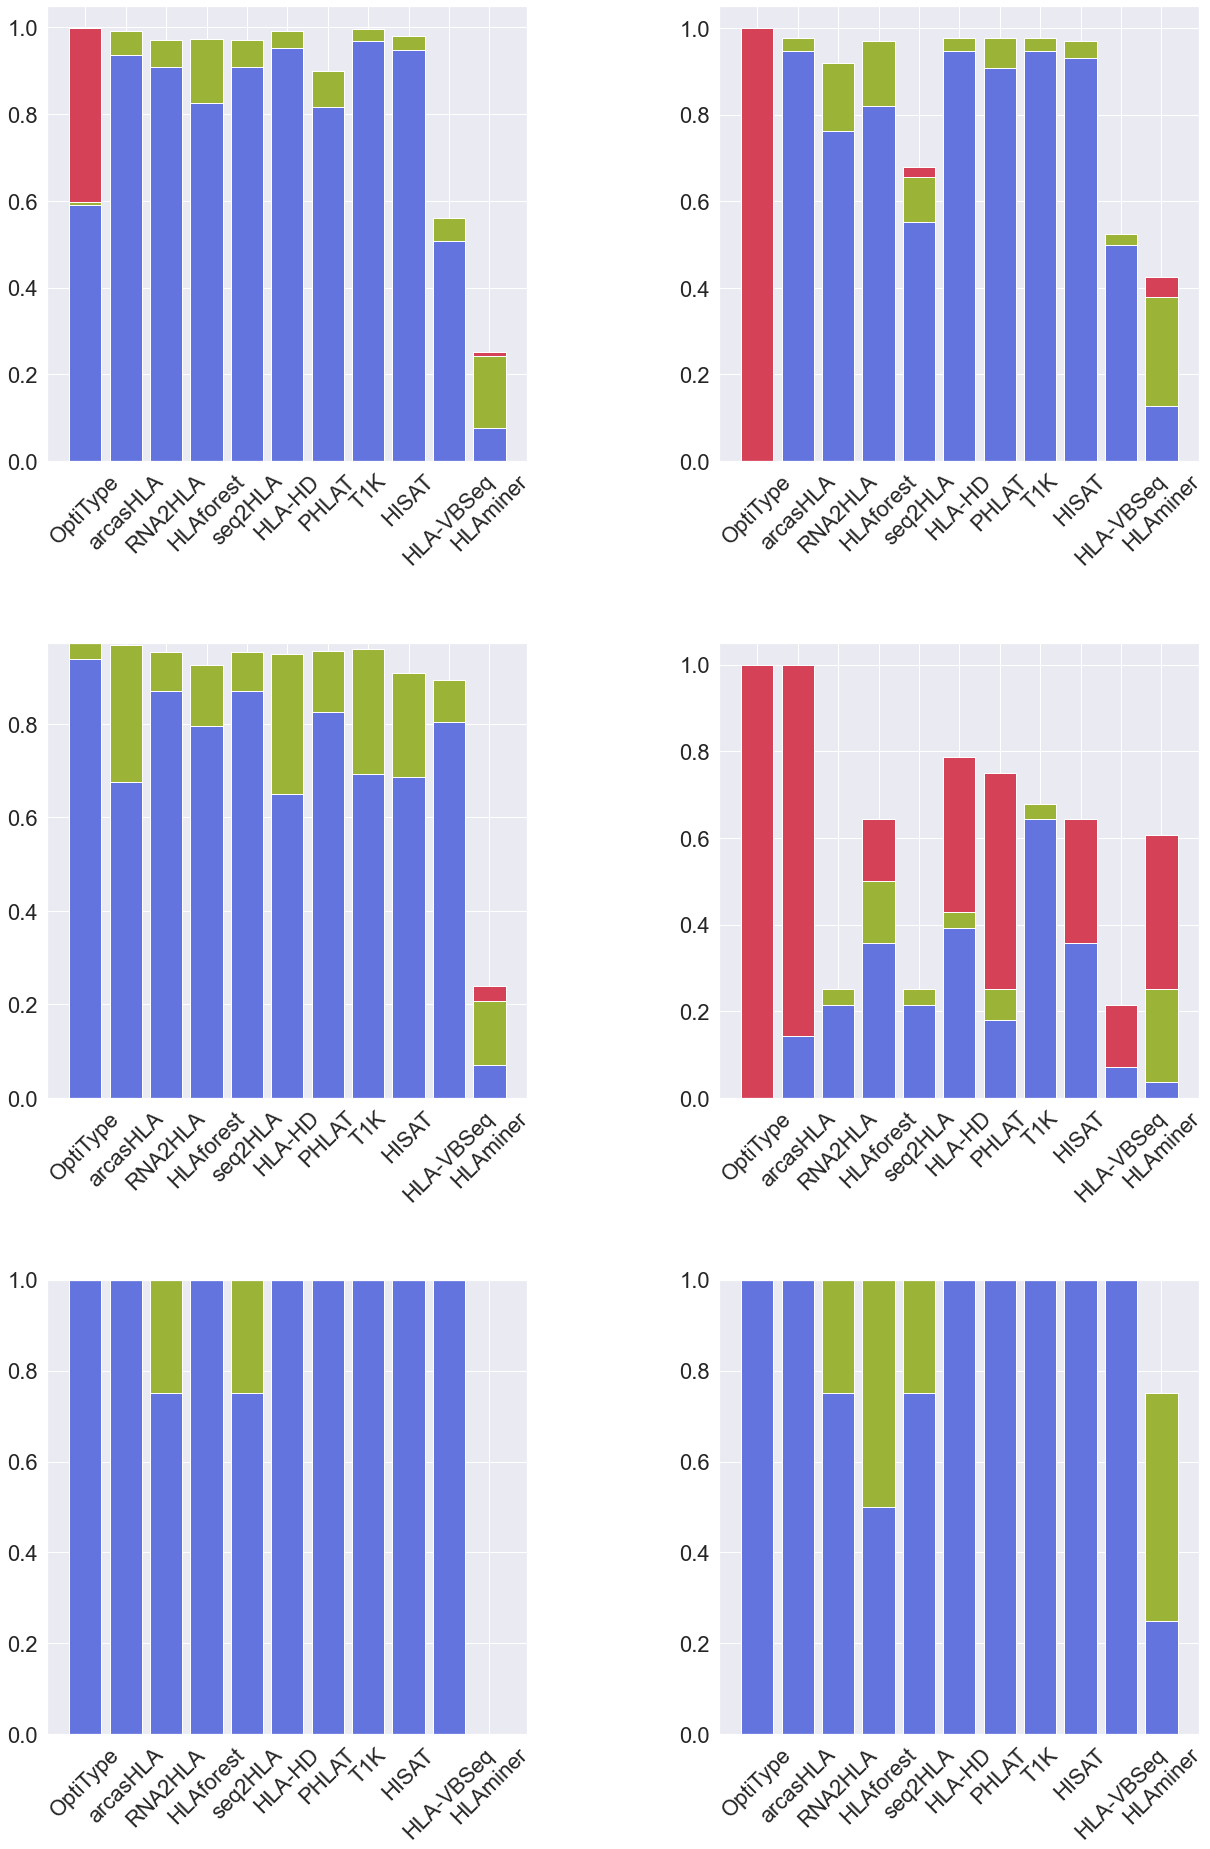

In [41]:
fig, ax = plt.subplots(3, 2,figsize=(20, 30))

idx = 0

for r in range(3):
    for c in range(2):
        final_data = np.sum(data[:,idx,:],axis=2) # get all data for dataset idx, and sum class I and class II
        
        twofield = final_data[:,2]/np.sum(final_data,axis=1)
        onefield = final_data[:,1]/np.sum(final_data,axis=1)
        nocall = final_data[:,3]/np.sum(final_data,axis=1)
        miscall = 1-twofield-onefield-nocall
        
        ax[r][c].bar(tools,twofield,color = palette[2])
        ax[r][c].bar(tools,onefield,bottom=twofield,color=palette[1])
        ax[r][c].bar(tools,nocall,bottom=onefield+twofield,color=palette[0])
        
        ax[r][c].set_xticklabels(labels = labels, rotation = 45)
        
        idx += 1
        
        
plt.subplots_adjust(left=0.1,
            bottom=0.1, 
            right=0.9, 
            top=0.9, 
            wspace=0.4, 
            hspace=0.4)


[0.98537415 0.93571429 0.90918367 0.82612245 0.90918367 0.95204082
 0.81632653 0.96836735 0.9477551  0.50796243 0.07803171]
[0.         0.94767442 0.76162791 0.81976744 0.56547619 0.94767442
 0.90697674 0.94767442 0.93023256 0.5        0.13414634]
[0.94       0.67666667 0.87       0.79666667 0.87       0.65
 0.82666667 0.69333333 0.68666667 0.80333333 0.07241379]
[0.         1.         0.21428571 0.41666667 0.21428571 0.61111111
 0.35714286 0.64285714 0.5        0.08333333 0.05555556]
[1.   1.   0.75 1.   0.75 1.   1.   1.   1.   1.   0.  ]
[1.   1.   0.75 0.5  0.75 1.   1.   1.   1.   1.   0.25]


/var/folders/j4/pd1pbcl90xz683wfkd2drjqw0000gn/T/ipykernel_94484/1358125654.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[r][c].set_xticklabels(labels = labels, rotation = 45)
/var/folders/j4/pd1pbcl90xz683wfkd2drjqw0000gn/T/ipykernel_94484/1358125654.py:16: RuntimeWarning: invalid value encountered in true_divide
  twofield = final_data[:,2]/np.sum(final_data,axis=1)
/var/folders/j4/pd1pbcl90xz683wfkd2drjqw0000gn/T/ipykernel_94484/1358125654.py:17: RuntimeWarning: invalid value encountered in true_divide
  onefield = final_data[:,1]/np.sum(final_data,axis=1)
/var/folders/j4/pd1pbcl90xz683wfkd2drjqw0000gn/T/ipykernel_94484/1358125654.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[r][c].set_xticklabels(labels = labels, rotation = 45)
/var/folders/j4/pd1pbcl90xz683wfkd2drjqw0000gn/T/ipykernel_94484/1358125654.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[r][c].set_xti

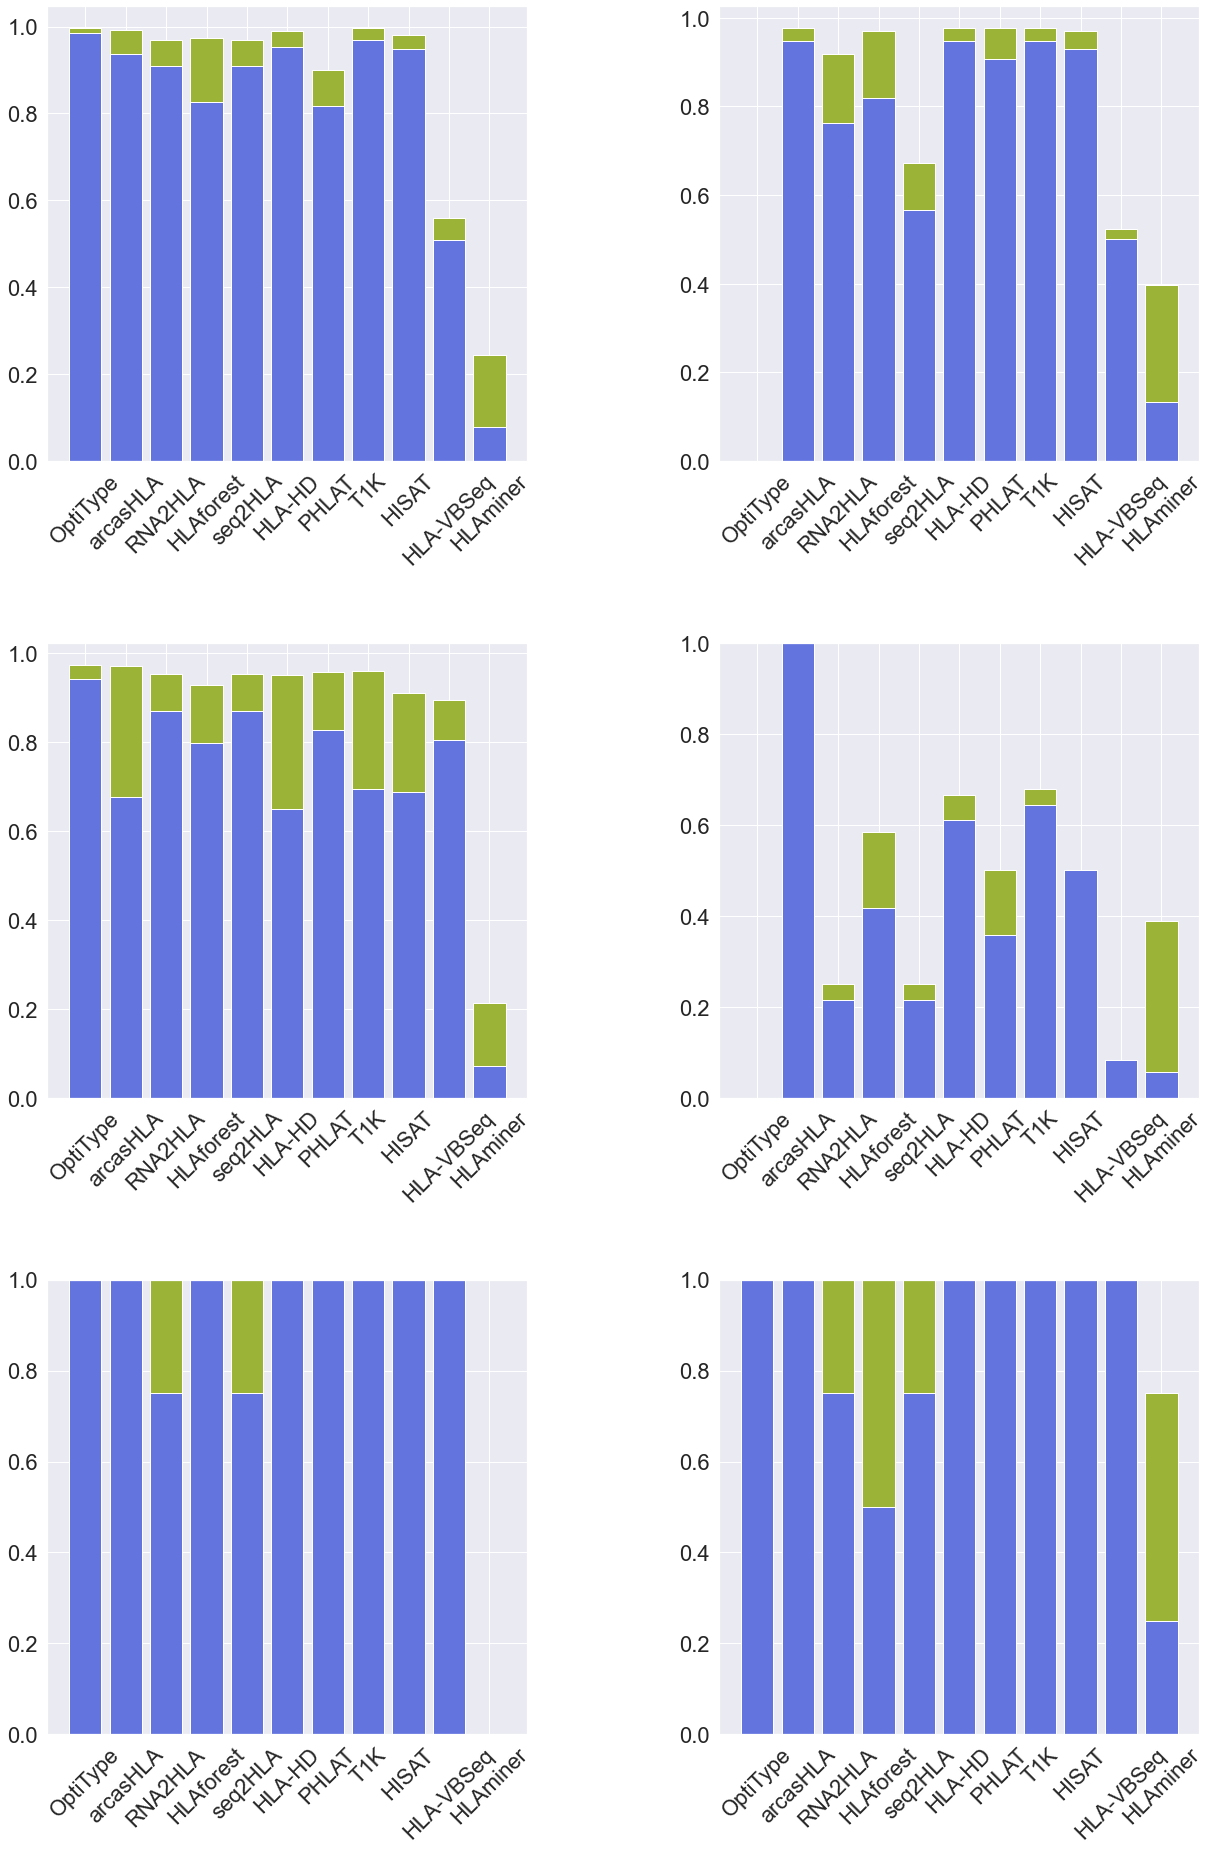

In [51]:
fig, ax = plt.subplots(3, 2,figsize=(20, 30))

idx = 0

for r in range(3):
    for c in range(2):
        final_data = np.sum(data[:,idx,:],axis=2) # get all data for dataset idx, and sum class I and class II
        final_data = final_data[:,:3]
        
            
        twofield = final_data[:,2]/np.sum(final_data,axis=1)
        onefield = final_data[:,1]/np.sum(final_data,axis=1)
        
        np.nan_to_num(twofield,0) 
        np.nan_to_num(onefield,0)
        
        print(twofield)
        
        
        ax[r][c].bar(tools,twofield,color = palette[2])
        ax[r][c].bar(tools,onefield,bottom=twofield,color=palette[1])
        
        ax[r][c].set_xticklabels(labels = labels, rotation = 45)
        
        idx += 1
        
        
plt.subplots_adjust(left=0.1,
            bottom=0.1, 
            right=0.9, 
            top=0.9, 
            wspace=0.4, 
            hspace=0.4)
